In [1]:
setwd('/import/figure4/')

In [2]:
library(readxl)

Warning message:
"package 'readxl' was built under R version 4.2.3"


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,mmu04668,TNF signaling pathway,35/564,115/9070,7.86e-16,2.44e-13,1.78e-13,Cxcl2/Lif/Tnfrsf1b/Nfkbia/Il1b/Bcl3/Ptgs2/Socs3/Il6/Traf1/Tnfaip3/Ccl5/Nfkb1/Icam1/Fas/Tnf/Mapk11/Cflar/Ccl2/Lta/Edn1/Birc3/Csf2/Mmp9/Birc2/Mmp3/Irf1/Sele/Creb5/Mmp14/Ccl12/Cxcl10/Cx3cl1/Mapk12/Vegfc,35
2,mmu04060,Cytokine-cytokine receptor interaction,49/564,292/9070,1.10e-10,6.76e-09,4.92e-09,Csf3/Il27/Cxcl2/Ccl22/Lif/Tnfrsf1b/Il1b/Il1a/Ccl9/Il6/Ebi3/Cd40/Cxcl16/Ccl5/Il1rn/Tnfsf9/Ltb/Il2rg/Fas/Tnf/Ccl2/Ccl3/Lta/Ifnar1/Csf2/Il36a/Il10ra/Ccl6/Tnfrsf13b/Il23a/Tnfsf15/Cxcl11/Tnfrsf8/Cxcr6/Gdf15/Ccr10/Tgfb1/Il33/Cxcl9/Ccl17/Ccl12/Tnfrsf14/Il12b/Ccl7/Tslp/Cxcl10/Cx3cl1/Ccl4/Il36rn,49


,gene,LPS_1,LPS_2,LPS_3,LPS_4,Z_1,Z_2,Z_3,Z_4,LPS,OPN,log2FoldChange,stat,pvalue,padj,gene_name,regulate
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSMUSG00000038067,47029,54938,25655,38278,33,31,15,19,41475.00,24.5,11.263460,42.33462,0,0,Csf3,Up
2,ENSMUSG00000044701,8135,6887,6048,7515,52,78,36,28,7146.25,48.5,7.748594,37.89905,0,0,Il8,Up



Down   Up 
2932 2519 

[1] "#8DD3C7" "#FFFFB3" "#BEBADA"

Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


png 
  2

Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


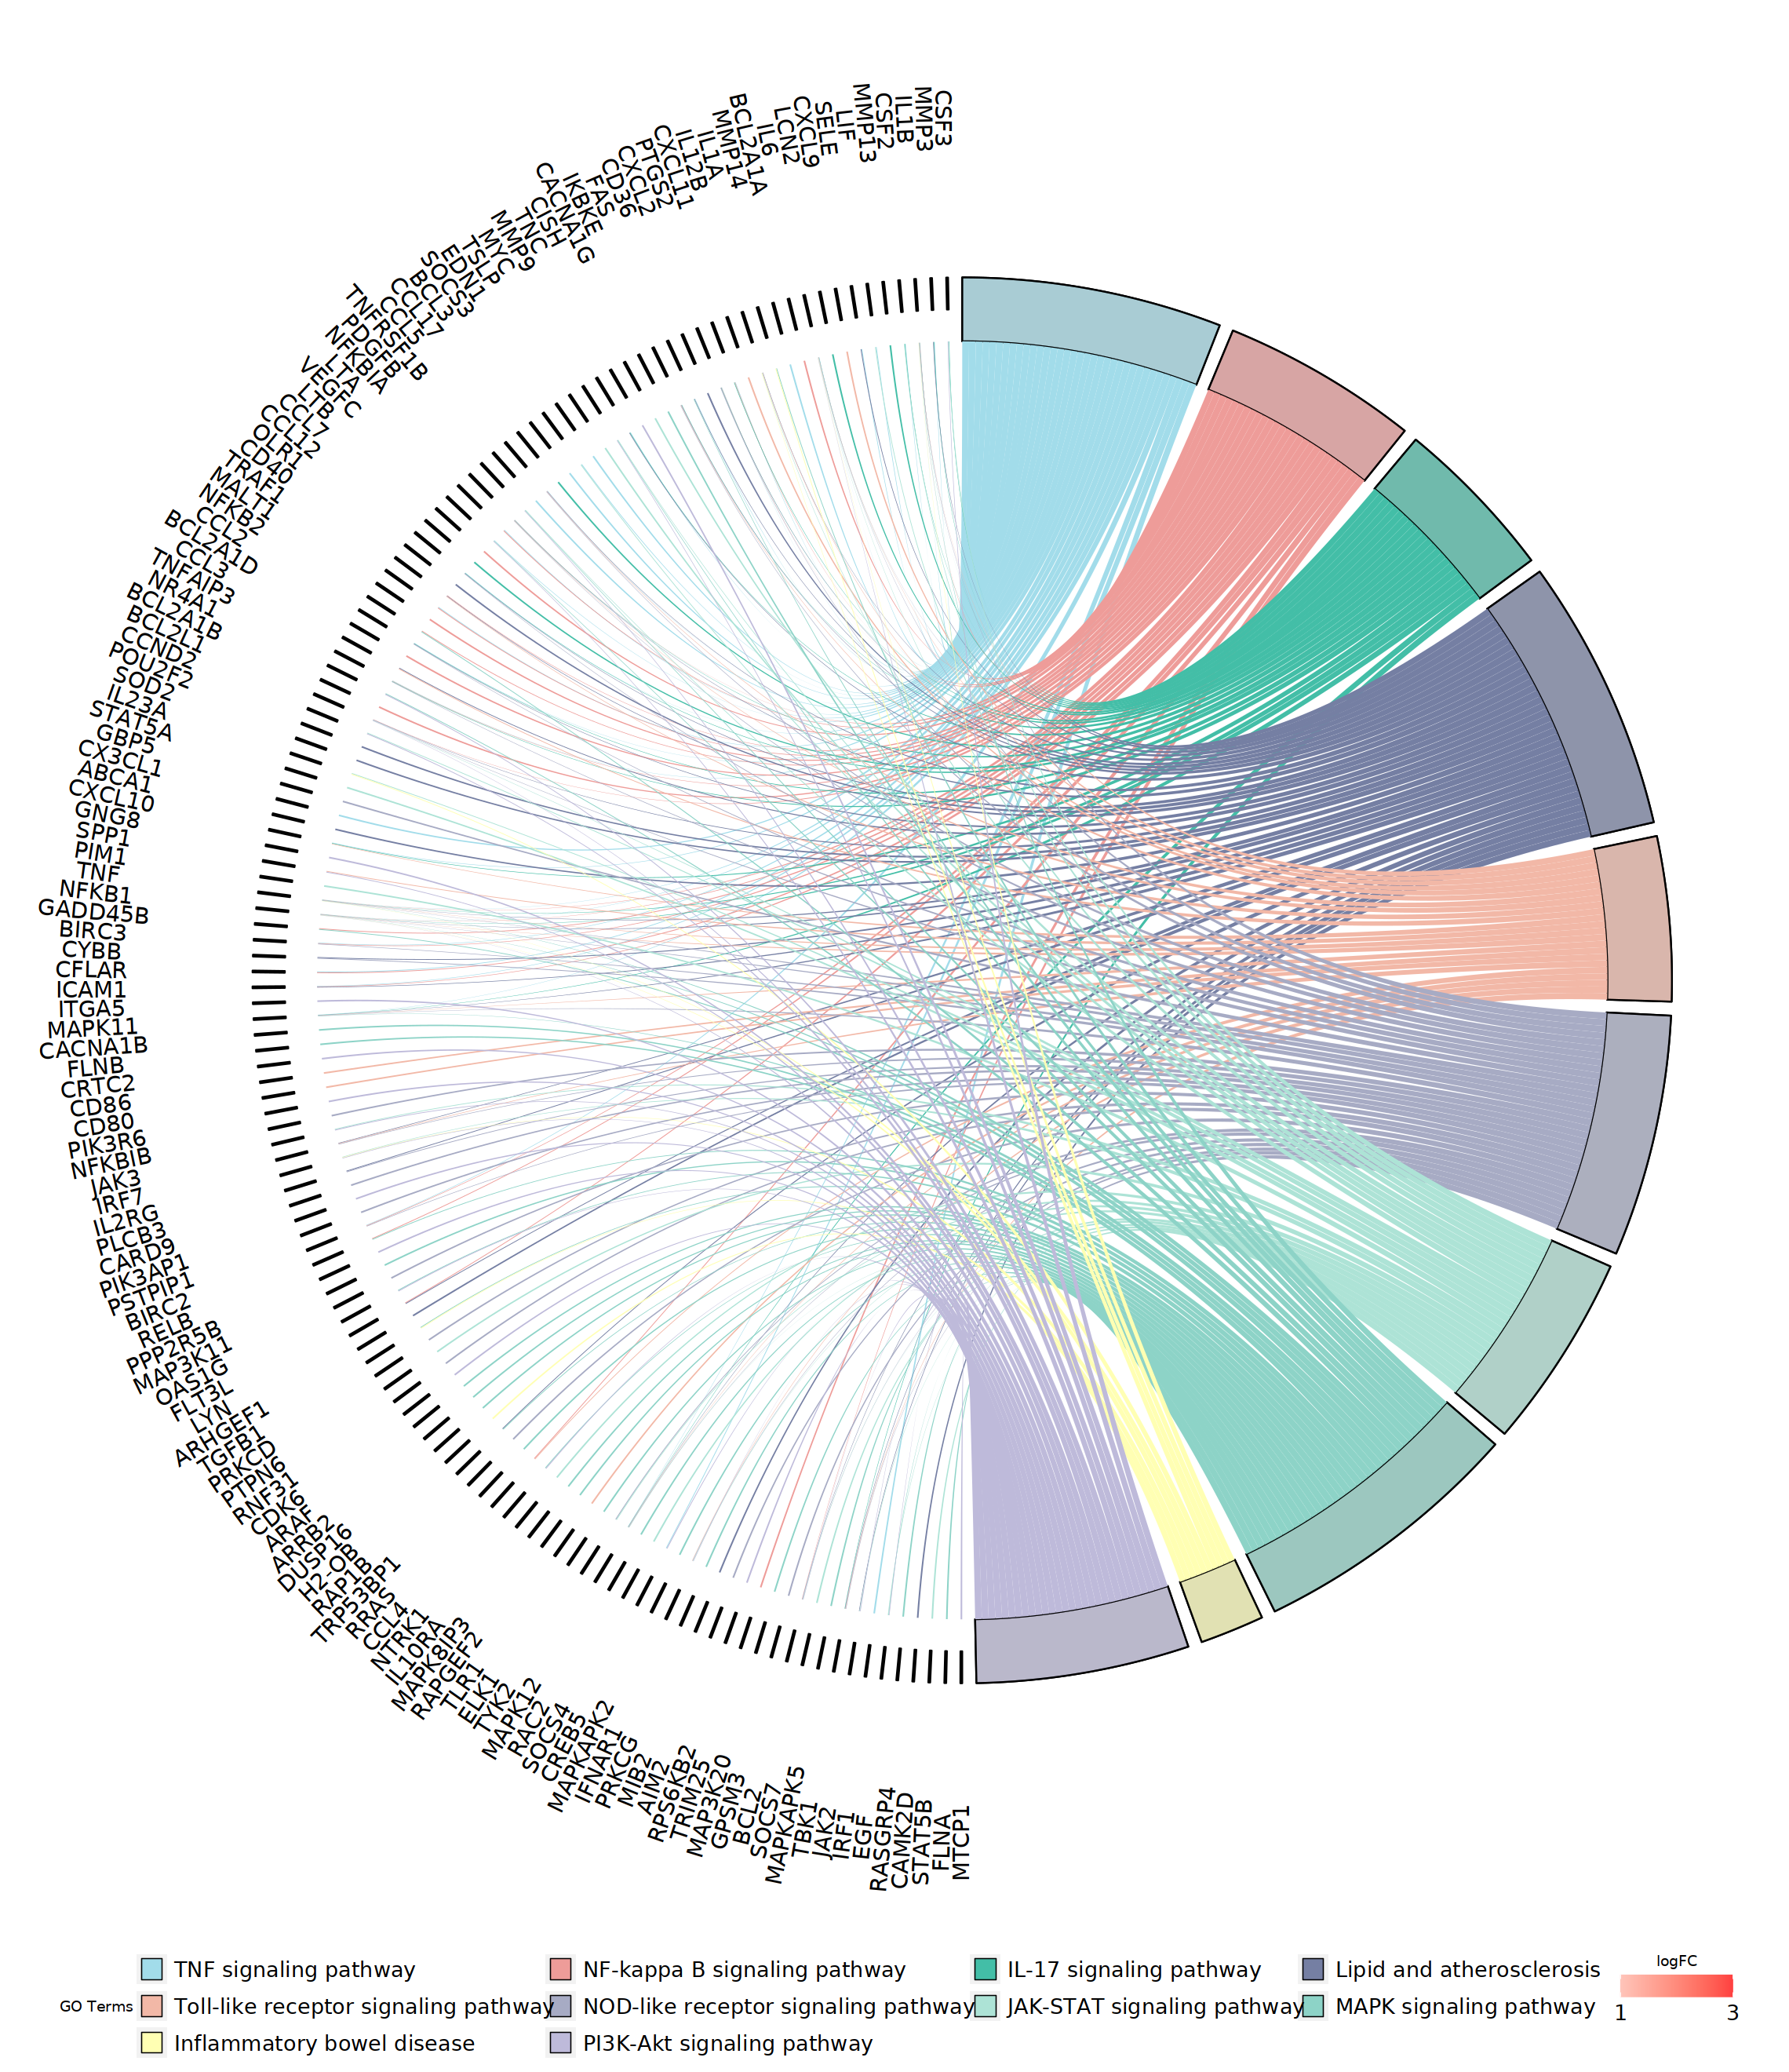

In [37]:
kegg = read.table('./kegg.o2.txt',header =T,sep = '\t')

head(kegg,2)

 library(readxl)
    library(ggrepel)
    library(dplyr)
    library(GOplot)

    sig.gene = read.table('./o2.circle.txt',sep = '\t',header = T)

head(sig.gene,2)

table(sig.gene$regulate)

sig.gene = sig.gene %>% filter( padj < 0.01)

    
    colnames(sig.gene)[16] = 'symbol'
    sig.gene = sig.gene[,c(16,12,15)]
    colnames(sig.gene) = c('ID','logFC','adj_pval')

    go = kegg
    go2 = go[,c(2,1,2,6,8)]

GOID = c('mmu04668',
'mmu04064',
'mmu04657',
'mmu05417',
'mmu04620',
'mmu04621',
'mmu04630',
'mmu04010',
'mmu05321',
'mmu04151'
)

go2 = go2 %>% filter(.,ID %in% GOID)
    go2$geneID = gsub('/',',',go2$geneID)
    colnames(go2) = c('category','ID','term','adj_pval','genes')
    circ<-circle_dat(go2,sig.gene)

options(repr.plot.height = 22,repr.plot.width = 19)

ribbon.col=brewer.pal(3, "Set3")

ribbon.col

color = c('#A2DCEA', '#EE9C99',  '#43BEA7',  '#757FA3',  '#F2B8A7',  '#A7ABC4',   '#ADE3D6','#8DD3C7','#FFFFB3','#BEBADA')

sig.gene$ID = toupper(sig.gene$ID)
chord <- chord_dat(circ, sig.gene, go2$term)
p = GOChord(chord,space = 0.02,gene.order = 'logFC',gene.space = 0.35,border.size = 0,gene.size = 6,
           ribbon.col=color,
           process.label = 16
     
           
        )
pdf("chord.pdf",height = 22,width = 19)
p
dev.off()

p

### 衰老

In [71]:
GO_all = read.table('./kegg.old.txt',header =T,sep = '\t')

In [72]:
gene = read.table('./old.squ.txt',header =T,sep = '\t')

In [73]:
Genelist = gene[,c(13,9,2,3,11,11,4,14)]

In [74]:
colnames(Genelist) = c('ID','logFC','AveExpr','t','P.Value','adj.P.Val','B','group')

In [75]:
Genelist$AveExpr = 1
Genelist$t = 1
Genelist$B = 1

In [76]:
library(stringr)
GO_all$geneID <- gsub(pattern = '/',replacement = ', ',GO_all$geneID)

In [77]:
GO_all = GO_all[,c(2,1,2,8,6)]

In [78]:
colnames(GO_all) = c('Category','ID','Term','Genes','adj_pval')

In [79]:
GO_all[1:100,1] = 'BP'
GO_all[101:200,1] = 'MF'
GO_all[201:230,1] = 'CC'

In [80]:
rownames(GO_all) = GO_all[,'ID']

In [81]:
david <- GO_all %>% 
  tibble::rownames_to_column(var="wait") 

In [82]:
colnames(david)

[1] "wait"     "Category" "ID"       "Term"     "Genes"    "adj_pval"

In [83]:



David <- david%>% 
  dplyr::select(c(2:4,5,6)) %>% 
  dplyr::rename(Category = Category,
                Term = Term,
                Genes = Genes,
                adj_pval = adj_pval) 
# 交互


In [84]:
Genelist$AveExpr = 5

In [85]:
head(Genelist,4)

,ID,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,FOS,-2.269120,5,1,7.38e-42,7.38e-42,1,Down
2,FOSB,-1.677355,5,1,5.80e-25,5.80e-25,1,Down
3,PLAU,1.563127,5,1,1.09e-21,1.09e-21,1,Up
4,CSF1,1.361131,5,1,9.52e-21,9.52e-21,1,Up


In [86]:
circ <- circle_dat(David,Genelist)

In [87]:
circ[is.na(circ)]=0

In [88]:
circ1 = circ

In [89]:
IDs = c('hsa04350',
'hsa05321',
'hsa04064',
'hsa04068',
'hsa04218',
'hsa04630',
'hsa04151'
)

In [90]:
library(grDevices)

In [91]:
intersect(circ$ID,IDs)

[1] "hsa04350" "hsa05321" "hsa04064" "hsa04068" "hsa04218" "hsa04630" "hsa04151"

In [92]:
options(repr.plot.width = 7,repr.plot.height = 7)

In [93]:
circ1 = circ %>%  dplyr::filter(ID %in% IDs)

In [94]:
options(repr.plot.width =8)

In [95]:
#https://www.jianshu.com/p/16fd75aff9d4

In [101]:
pdf('circos.pdf',width = 12,height = 9)
GOCircle(circ1, nsub = 7, label.size = 7,
         rad1 = 2, rad2 = 4, table.legend = T)
dev.off()

png 
  2

In [103]:
dat = read.table('./circle.txt',header =T,sep = '\t',row.names = 1)

dat = as.matrix(log2(dat+1))

dat=t(scale(t(dat))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]
options(repr.plot.width = 4,repr.plot.height = 6)

mat1 = dat

[1] 19  8

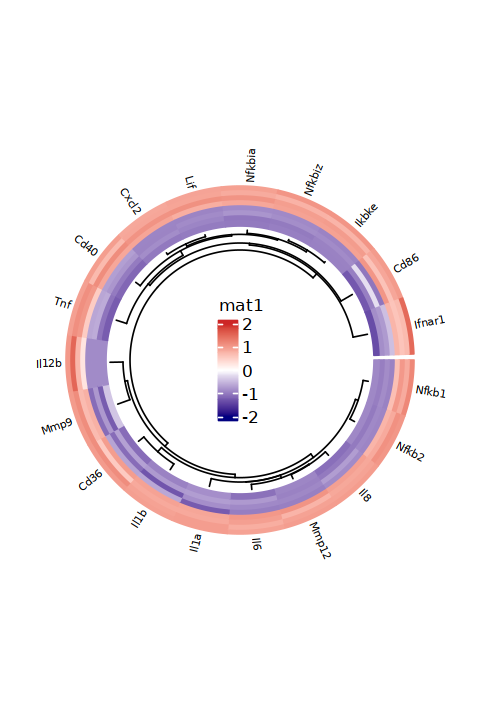

In [104]:
library(circlize)
library(ComplexHeatmap)
#绘制circoheatmap
col_fun1 = colorRamp2(c(-2, 0, 2), c("navy", "white", "firebrick3"))
circos.heatmap(mat1, col = col_fun1,dend.side = "inside",rownames.side = "outside")
#用于绘制legend
lgd = Legend(title = "mat1", col_fun = col_fun1)
grid.draw(lgd)
circos.clear()

In [105]:
library('ComplexHeatmap')
library('circlize')
library("RColorBrewer")

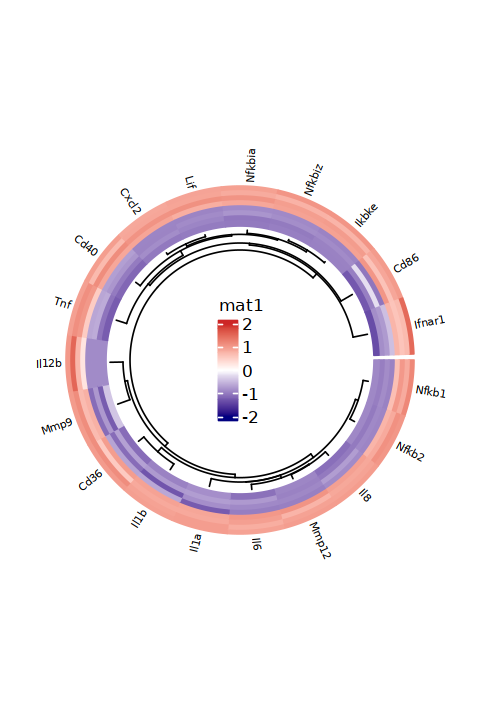

In [106]:
library(circlize)
library(ComplexHeatmap)
#绘制circoheatmap
col_fun1 = colorRamp2(c(-2, 0, 2), c("navy", "white", "firebrick3"))
circos.heatmap(mat1, col = col_fun1,dend.side = "inside",rownames.side = "outside")
#用于绘制legend
lgd = Legend(title = "mat1", col_fun = col_fun1)
grid.draw(lgd)
circos.clear()

In [107]:
options(repr.plot.height = 8,repr.plot.width = 8)

In [108]:
cn = colnames(mat1)

In [109]:
cn

[1] "LPS_1" "LPS_2" "LPS_3" "LPS_4" "Z_1"   "Z_2"   "Z_3"   "Z_4"

In [110]:
circos.clear()

In [116]:
pdf('circle.pdf')
col_fun1 = colorRamp2(c(-2, 0, 2), c("#234B82", "white", "#BF291F"))
circos.par(gap.after = c(20))#空出一段用于添加label
circos.heatmap(mat1, col = col_fun1,dend.side = "inside",rownames.side = "outside",track.height = 0.6)
circos.track(track.index = get.current.track.index(), panel.fun = function(x, y) {
  if(CELL_META$sector.numeric.index == 1) { # the last sector
    cn = colnames(mat1)
    n = length(cn)
    circos.text(rep(CELL_META$cell.xlim[2], n) + convert_x(0.1, "mm"), #x坐标
                1.5+(1:n)*1,#y坐标
                rev(cn), #标签
                cex = 1, adj = c(0, 1), facing = "inside")
  }
}, bg.border = NA)
lgd = Legend(title = "", col_fun = col_fun1)
grid.draw(lgd)
circos.clear()
dev.off()

Note: 8 points are out of plotting region in sector 'group', track '3'.



png 
  2

In [117]:
dat = read.table('./hetmap.txt',header =T,sep = '\t',row.names = 1,check.names = F)

dat = as.matrix(log2(dat+1))

dat=t(scale(t(dat))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]
options(repr.plot.width = 4,repr.plot.height = 6)

mat1 = dat

[1] 9 5

In [118]:
library(pheatmap)

Warning message:
"package 'pheatmap' was built under R version 4.2.3"

Attaching package: 'pheatmap'


The following object is masked from 'package:ComplexHeatmap':

    pheatmap




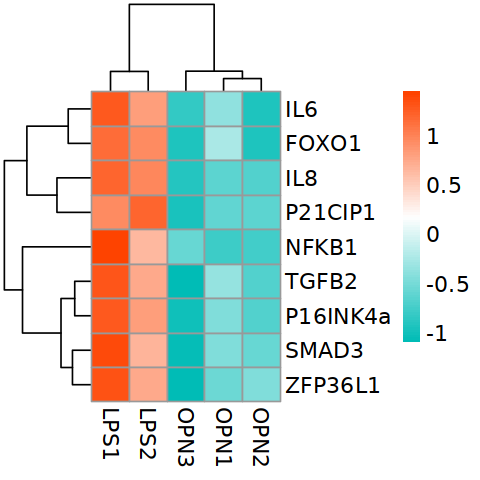

In [123]:
options(repr.plot.width = 4,repr.plot.height = 4)

xx = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=TRUE,
         show_colnames = TRUE,
          scale="none",
          #cluster_cols = F,
          fontsize_row = 13,
          fontsize_col = 13,
              fontsize = 13,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#00BCB6", "white", "#FE4300"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)


In [122]:
pdf('heatmap.pdf')
xx
dev.off()

png 
  2